In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Cargar datos

In [3]:
df = pd.read_excel('.../Online Retail_1.xlsx', sheet_name='Online Retail')

In [4]:
df.shape

(538914, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Limpieza de datos

#### - Cantidades con signo negativo

In [6]:
df.loc[df['Quantity'] <= 0].shape

(10028, 8)

In [7]:
df.shape

(538914, 8)

In [8]:
df = df.loc[df['Quantity'] > 0]

In [9]:
df.shape

(528886, 8)

#### - Registros que no tienen CustomerID

In [10]:
pd.isnull(df['CustomerID']).sum()

132516

In [11]:
df.shape

(528886, 8)

In [12]:
df = df[pd.notnull(df['CustomerID'])]

In [13]:
df.shape

(396370, 8)

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### - Excluir registros que corresponen al mes incompleto

In [15]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [16]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(17242, 8)

In [17]:
df.shape

(396370, 8)

In [18]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [19]:
df.shape

(379128, 8)

#### - Total de Ventas

In [20]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### - Data por Cliente

In [23]:
customer_df = df.groupby('CustomerID').agg({
    'Sales': sum,
    'InvoiceNo': lambda x: x.nunique()
})

customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']

In [24]:
customer_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1437.24,4,359.310000
12349.0,1457.55,1,1457.550000
12350.0,294.40,1,294.400000
12352.0,1385.74,7,197.962857
12353.0,89.00,1,89.000000
12354.0,1079.40,1,1079.400000
12355.0,459.40,1,459.400000


In [25]:
customer_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4294.000000,4294.000000,4294.000000
mean,1920.781607,4.105496,398.280992
std,8273.400036,7.350739,1276.972212
min,0.000000,1.000000,0.000000
25%,302.212500,1.000000,178.205000
50%,653.030000,2.000000,292.044167
75%,1573.077500,4.000000,426.622500
max,267410.000000,197.000000,77183.600000


In [26]:
rank_df = customer_df.rank(method='first')

In [27]:
rank_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4287.0,1.0,4294.0
12347.0,3962.0,3474.0,3887.0
12348.0,3116.0,2865.0,2792.0
12349.0,3131.0,2.0,4210.0
12350.0,1035.0,3.0,2158.0
12352.0,3071.0,3644.0,1295.0
12353.0,125.0,4.0,208.0
12354.0,2793.0,5.0,4147.0
12355.0,1686.0,6.0,3366.0


In [28]:
rank_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4294.000000,4294.000000,4294.000000
mean,2147.500000,2147.500000,2147.500000
std,1239.715357,1239.715357,1239.715357
min,1.000000,1.000000,1.000000
25%,1074.250000,1074.250000,1074.250000
50%,2147.500000,2147.500000,2147.500000
75%,3220.750000,3220.750000,3220.750000
max,4294.000000,4294.000000,4294.000000


In [29]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()

In [30]:
normalized_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.725799,-1.731446,1.731446
12347.0,1.463642,1.070004,1.403145
12348.0,0.781228,0.578762,0.519877
12349.0,0.793327,-1.730639,1.663688
12350.0,-0.897383,-1.729833,0.008470
12352.0,0.744929,1.207132,-0.687658
12353.0,-1.631423,-1.729026,-1.564472
12354.0,0.520684,-1.728219,1.612870
12355.0,-0.372263,-1.727413,0.982887


In [31]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4.294000e+03,4.294000e+03,4.294000e+03
mean,1.058254e-16,5.165872e-17,-7.435960e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731446e+00,-1.731446e+00,-1.731446e+00
25%,-8.657229e-01,-8.657229e-01,-8.657229e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.657229e-01,8.657229e-01,8.657229e-01
max,1.731446e+00,1.731446e+00,1.731446e+00


# 3. Segmentación de Clientes con K-Means Clustering

In [32]:
from sklearn.cluster import KMeans

#### - K-Means Clustering

In [33]:
kmeans = KMeans(n_clusters = 4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

In [34]:
kmeans

KMeans(n_clusters=4)

In [35]:
kmeans.labels_

array([0, 1, 1, ..., 3, 2, 1])

In [36]:
kmeans.cluster_centers_

array([[-0.14650274, -0.85539949,  0.7827999 ],
       [ 1.20573826,  0.98783617,  0.90196885],
       [ 0.26137429,  0.74680477, -0.62535925],
       [-1.23696361, -0.78220651, -1.06191024]])

In [37]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [38]:
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.725799,-1.731446,1.731446,0
12347.0,1.463642,1.070004,1.403145,1
12348.0,0.781228,0.578762,0.519877,1
12349.0,0.793327,-1.730639,1.663688,0
12350.0,-0.897383,-1.729833,0.008470,0


In [39]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    1062
1    1112
2     958
3    1162
Name: TotalSales, dtype: int64

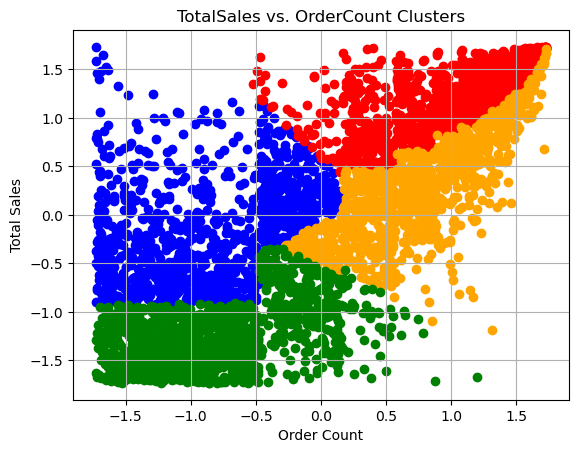

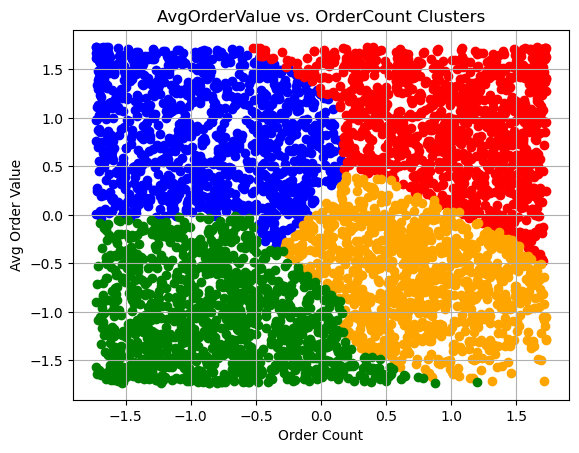

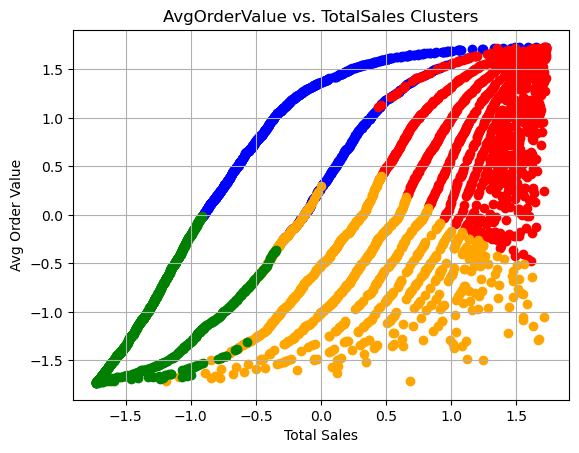

In [40]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

#### - Selección del mejor número de clusters

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4112
Silhouette Score for 5 Clusters: 0.3782
Silhouette Score for 6 Clusters: 0.3707
Silhouette Score for 7 Clusters: 0.3925
Silhouette Score for 8 Clusters: 0.3826


#### - Interpretación de los segmentos de clientes

In [44]:
kmeans = KMeans(n_clusters = 4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)

In [45]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [46]:
four_cluster_df.head(15)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.725799,-1.731446,1.731446,3
12347.0,1.463642,1.070004,1.403145,0
12348.0,0.781228,0.578762,0.519877,0
12349.0,0.793327,-1.730639,1.663688,3
12350.0,-0.897383,-1.729833,0.008470,3
12352.0,0.744929,1.207132,-0.687658,2
12353.0,-1.631423,-1.729026,-1.564472,1
12354.0,0.520684,-1.728219,1.612870,3
12355.0,-0.372263,-1.727413,0.982887,3


In [47]:
kmeans.cluster_centers_

array([[ 1.20918955,  1.00731327,  0.88183079],
       [-1.24250663, -0.7956096 , -1.05710518],
       [ 0.23725708,  0.73027852, -0.63594235],
       [-0.12741689, -0.84387953,  0.79751604]])

In [48]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
high_value_cluster.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12352.0,0.744929,1.207132,-0.687658,2
12364.0,0.356937,0.168184,0.103653,2
12395.0,1.249884,1.522527,-0.469866,2
12399.0,0.471479,0.582795,-0.197223,2
12413.0,0.068161,0.171410,-0.423081,2


In [49]:
customer_df.loc[high_value_cluster.index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,962.000000,962.000000,962.000000
mean,1058.716715,5.509356,206.610304
std,1322.569621,8.436851,57.382337
min,201.120000,2.000000,28.731429
25%,550.305000,3.000000,166.133500
50%,801.175000,4.000000,208.321000
75%,1190.022500,6.000000,244.630000
max,31247.900000,197.000000,341.006667


In [50]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(high_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,614
REX CASH+CARRY JUMBO SHOPPER,440
REGENCY CAKESTAND 3 TIER,331
ASSORTED COLOUR BIRD ORNAMENT,314
PARTY BUNTING,308


In [51]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(
            four_cluster_df.loc[four_cluster_df['Cluster'] == 3].index
        )
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
REGENCY CAKESTAND 3 TIER,209
ASSORTED COLOUR BIRD ORNAMENT,159
WHITE HANGING HEART T-LIGHT HOLDER,157
SET OF 3 CAKE TINS PANTRY DESIGN,153
PARTY BUNTING,140
